In [23]:
import torch
from torch import atan
from torch.autograd import grad
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.misc import derivative

from sympy import symbols, integrate, sinh, E, diff
import sympy as sp
from scipy.special import roots_legendre


In [24]:
x = symbols('x')
u = -2*E/(E**2 - 1)*sinh(x) + x
print(integrate(u, (x, 0, 1)).evalf())
un = 0.14588*x*(1-x) + 0.16279*x**2*(1-x)
du = diff(u, x)


0.0378828427399902


In [25]:
def lagrange(x, y, num_points, x_test):
    # 所有的基函数值，每个元素代表一个基函数的值
    l = np.zeros(shape=(num_points, ))

    # 计算第k个基函数的值
    for k in range(num_points):
        # 乘法时必须先有一个值
        # 由于l[k]肯定会被至少乘n次，所以可以取1
        l[k] = 1
        # 计算第k个基函数中第k_个项（每一项：分子除以分母）
        for k_ in range(num_points):
            # 这里没搞清楚，书中公式上没有对k=k_时，即分母为0进行说明
            # 有些资料上显示k是不等于k_的
            if k != k_:
                # 基函数需要通过连乘得到
                l[k] = l[k]*(x_test-x[k_])/(x[k]-x[k_])
            else:
                pass
    # 计算当前需要预测的x_test对应的y_test值
    L = 0
    for i in range(num_points):
        # 求所有基函数值的和
        L += y[i]*l[i]
    return L


def f(x):
    # x.grad.zero_()
    constant = a*xb+torch.zeros_like(x)
    dy = (1 - x) * (atan(a * (x - xb)) +
                    atan(constant))
    return dy
    


def G_integrate(u, x, N=3):
    N = N  # 取3个样本点
    a = x.min()  # 积分上下限
    b = x.max()
    x, w = roots_legendre(N)
    #print(x)
    x = torch.Tensor(x)
    w = torch.Tensor(w)

    xp = x*(b-a)/2+(b+a)/2
    wp = w*(b-a)/2

    s = 0
    for i in range(N):
        s += wp[i]*u(x=xp[i])
    return s


def error(u, uh):
    du = diff(u, x)
    B = integrate((du**2+u**2), (x, 0, 1))
    A = (1/2*B)**0.5
    dut = diff(un-u, x)
    Bt = integrate((dut**2+(un-u)**2), (x, 0, 1))
    At = (1/2*Bt)**0.5
    return float(At.evalf()/A.evalf())


In [26]:

x = torch.linspace(0, 1, 5, requires_grad=True)

a = 0.5
xb = 0.8
print(G_integrate(f, x))

def error(u, uh, x=x):
    dudx = grad(u, x,
                grad_outputs=torch.ones(x.shape),  # 注意这里需要人为指定
                create_graph=True,
                retain_graph=True)  # 为计算二阶导保持计算图
    B = G_integrate((dudx**2+u**2), x)
    A = (1/2*B)**0.5
    dut = diff(un-u, x)
    Bt = integrate((dut**2+(un-u)**2), (x, 0, 1))
    At = (1/2*Bt)**0.5
    return float(At.evalf()/A.evalf())


tensor(0.0769, grad_fn=<AddBackward0>)


In [29]:
x = torch.linspace(0, 1, 5, requires_grad=True)
a = 50
xb = 0.8

y = f(x)
z = 2*f(x)
#f(x, a, xb)
# print(y)
# dy.backward()
# plt.plot(x.grad)
dydx = grad(y, x,
            grad_outputs=torch.ones(x.shape),  # 注意这里需要人为指定
            create_graph=True,
            retain_graph=True)  # 为计算二阶导保持计算图
dzdx = grad(z, x,
            grad_outputs=torch.ones(x.shape),  # 注意这里需要人为指定
            create_graph=True,
            retain_graph=True)  # 为计算二阶导保持计算图
print('dydx', dydx[0])
print('dzdx', dzdx[0])
d2ydx2 = grad(dydx[0], x,
            grad_outputs=torch.ones(x.shape),  # 注意这里需要人为指定
            create_graph=True,
            retain_graph=True)  # 为计算二阶导保持计算图
print('d2ydx2', d2ydx2)

dydx tensor([ 0.0312,  0.0382,  0.0690,  1.3686, -3.0169], grad_fn=<AddBackward0>)
dzdx tensor([ 0.0625,  0.0763,  0.1381,  2.7373, -6.0339], grad_fn=<AddBackward0>)
d2ydx2 (tensor([ 1.5566e-02,  4.7783e-02,  2.9172e-01,  4.5660e+01, -9.9010e-01],
       grad_fn=<AddBackward0>),)


In [ ]:
x = torch.linspace(0, 1, 5, requires_grad=True)
xp = x*(1+2)/2+1
xp

tensor([1.0000, 1.3750, 1.7500, 2.1250, 2.5000], grad_fn=<AddBackward0>)

In [ ]:
x = torch.linspace(0, 1, 5, requires_grad=True)
xp = x*(1-2)/2+(1+1)/2
print(G_integrate(f(x, a=a, xb=xb), x, scale=(0, 1)))


TypeError: f() got an unexpected keyword argument 'a'

dydx tensor([ 0.0312,  0.0314,  0.0316,  0.0317,  0.0319,  0.0321,  0.0323,  0.0325,
         0.0327,  0.0329,  0.0332,  0.0334,  0.0337,  0.0339,  0.0342,  0.0345,
         0.0348,  0.0351,  0.0354,  0.0358,  0.0361,  0.0365,  0.0369,  0.0374,
         0.0378,  0.0383,  0.0388,  0.0393,  0.0399,  0.0405,  0.0411,  0.0418,
         0.0425,  0.0433,  0.0441,  0.0450,  0.0459,  0.0469,  0.0480,  0.0491,
         0.0504,  0.0517,  0.0531,  0.0547,  0.0564,  0.0583,  0.0603,  0.0625,
         0.0649,  0.0676,  0.0706,  0.0738,  0.0774,  0.0815,  0.0860,  0.0911,
         0.0969,  0.1034,  0.1109,  0.1195,  0.1295,  0.1411,  0.1548,  0.1710,
         0.1904,  0.2139,  0.2429,  0.2789,  0.3245,  0.3835,  0.4614,  0.5672,
         0.7154,  0.9312,  1.2600,  1.7885,  2.6869,  4.2646,  6.7559,  8.5539,
         6.3195,  2.6938,  0.3611, -0.9108, -1.6237, -2.0496, -2.3201, -2.5011,
        -2.6276, -2.7192, -2.7875, -2.8397, -2.8805, -2.9130, -2.9392, -2.9607,
        -2.9785, -2.9935, -3.0061, 

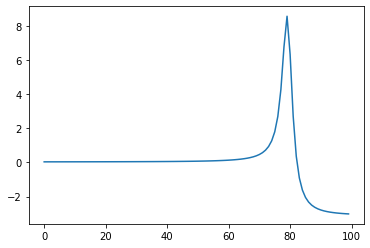

In [ ]:
x = torch.linspace(0, 1, 100, requires_grad=True)
a = 50
xb = 0.8

y = f(x, a, xb)
#f(x, a, xb)
# print(y)
# dy.backward()
# plt.plot(x.grad)
dydx = grad(y, x,
            grad_outputs=torch.ones(x.shape),  # 注意这里需要人为指定
            create_graph=True,
            retain_graph=True)  # 为计算二阶导保持计算图
print('dydx', dydx[0])
d2ydx2 = grad(dydx[0], x,
            grad_outputs=torch.ones(x.shape),  # 注意这里需要人为指定
            create_graph=True,
            retain_graph=True)  # 为计算二阶导保持计算图
print('d2ydx2', d2ydx2)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 28 08:59:50 2020

@author: 周文青

利用torch.autograd计算单变量标量函数y=x^3+sin(x)在x分别为1，pi和5时的一阶导数和二
阶导数

"""
import torch as tc
import numpy as np

# %% 方法1：采用torch.autograd.grad
x = tc.linspace(0, 1, 5, requires_grad=True)
y = x**3
print(y)
dy = 3*x**2
d2y = 6*x

dydx = tc.autograd.grad(y, x,
                        grad_outputs=tc.ones(x.shape),  # 注意这里需要人为指定
                        create_graph=True,
                        retain_graph=True)  # 为计算二阶导保持计算图
print(dydx)  # 注意输出是一个tuple，取第一个元素
# (tensor([ 3.5403, 28.6088, 75.2837], grad_fn=<AddBackward0>),)
print(dy)
# tensor([ 3.5403, 28.6088, 75.2837], grad_fn=<AddBackward0>)


tensor([0.0000, 0.0156, 0.1250, 0.4219, 1.0000], grad_fn=<PowBackward0>)
(tensor([0.0000, 0.1875, 0.7500, 1.6875, 3.0000], grad_fn=<MulBackward0>),)
tensor([0.0000, 0.1875, 0.7500, 1.6875, 3.0000], grad_fn=<MulBackward0>)


In [ ]:

u = f(x, a, xb)
print(x.grad)


tensor([ 0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,
         0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,
         0.0003,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,
         0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,
         0.0004,  0.0004,  0.0004,  0.0004,  0.0005,  0.0005,  0.0005,  0.0005,
         0.0005,  0.0005,  0.0005,  0.0005,  0.0006,  0.0006,  0.0006,  0.0006,
         0.0006,  0.0007,  0.0007,  0.0007,  0.0008,  0.0008,  0.0009,  0.0009,
         0.0010,  0.0010,  0.0011,  0.0012,  0.0013,  0.0014,  0.0015,  0.0017,
         0.0019,  0.0021,  0.0024,  0.0028,  0.0032,  0.0038,  0.0046,  0.0057,
         0.0072,  0.0093,  0.0126,  0.0179,  0.0269,  0.0426,  0.0676,  0.0855,
         0.0632,  0.0269,  0.0036, -0.0091, -0.0162, -0.0205, -0.0232, -0.0250,
        -0.0263, -0.0272, -0.0279, -0.0284, -0.0288, -0.0291, -0.0294, -0.0296,
        -0.0298, -0.0299, -0.0301, -0.03